In [1]:
%matplotlib inline

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.datasets import load_iris


# Model Training Classification

In [3]:
diabetes_data = pd.read_csv('diabetic_data.csv')

In [4]:
diabetes_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
diabetes_data.shape

(101766, 50)

In [6]:
diabetes_data.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [7]:
diabetes_target = diabetes_data['readmitted']
diabetes_attributes = diabetes_data.drop('readmitted', axis=1)

In [8]:
diabetes_attributes = pd.get_dummies(diabetes_attributes)

In [9]:
diabetes_attributes.shape

(101766, 2472)

In [10]:
diabetes_attributes_scaled = MinMaxScaler().fit_transform(diabetes_attributes)

In [11]:
attributes_train, attributes_test, targets_train, targets_test = train_test_split(
    diabetes_attributes_scaled, 
    diabetes_target,
    test_size=0.2,
    random_state=42
)

In [12]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(attributes_train, targets_train)

DecisionTreeClassifier(max_depth=3)

In [13]:
tree.score(attributes_train, targets_train)

0.5690438755957353

In [14]:
tree.score(attributes_test, targets_test)

0.5670629851626215

In [15]:
tree.feature_importances_

array([0.18220363, 0.11395714, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [16]:
forest = RandomForestClassifier(n_estimators=200, max_depth=3)

In [17]:
forest.fit(attributes_train, targets_train)

RandomForestClassifier(max_depth=3, n_estimators=200)

In [18]:
forest.score(attributes_train, targets_train)

0.5393799439886012

In [19]:
forest.score(attributes_test, targets_test)

0.5380760538469097

In [20]:
forest_1 = RandomForestClassifier(n_estimators=200, max_depth=50)

In [21]:
forest_1.fit(attributes_train, targets_train)

RandomForestClassifier(max_depth=50, n_estimators=200)

In [22]:
forest_1.score(attributes_train, targets_train)  # overfitting

0.9684813049673267

In [23]:
forest_1.score(attributes_test, targets_test)

0.5953129605974256

In [24]:
ada_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=20)

In [25]:
ada_boost.fit(attributes_train, targets_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=20)

In [26]:
ada_boost.score(attributes_train, targets_train)

0.5903060973812214

In [27]:
ada_boost.score(attributes_test, targets_test)

0.587452097867741

In [28]:
ada_boost.estimator_weights_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [41]:
iris = load_iris()

In [42]:
X = iris.data[:, :2] # Sepal length, sepal width
y = iris.target
h = 0.02 # Step size
color_dict = {0: "blue", 1: "lightgreen", 2: "red"}
colors = [color_dict[i] for i in y]

depth_2 = DecisionTreeClassifier(max_depth = 2).fit(X, y)
depth_4 = DecisionTreeClassifier(max_depth = 4).fit(X, y)
titles = ["Max depth = 2", "Max depth = 4"]

In [43]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

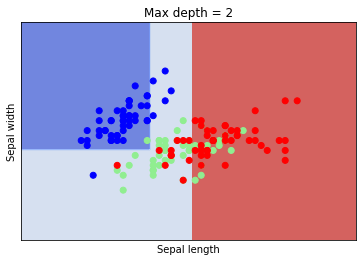

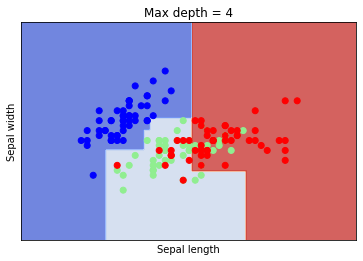

In [44]:
for i, classifier in enumerate((depth_2, depth_4)):
    plt.figure()
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)
    plt.scatter(X[:, 0], X[:, 1], c = colors)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()